count: 100  missing: 0


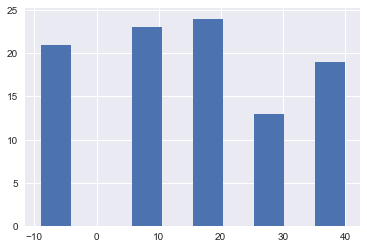

In [10]:
#py_missing_data.ipynb
%matplotlib inline
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt

total_observed=100
s = pd.Series(np.random.choice([10, 20, 30, 40, -9], total_observed))
h=s.hist()
print('count: {}  missing: {}'.format(s.count(),total_observed-s.count()))


count: 3  missing: 97
0    100.0
1    120.0
2      NaN
3      NaN
4      NaN
5    200.0
dtype: float64


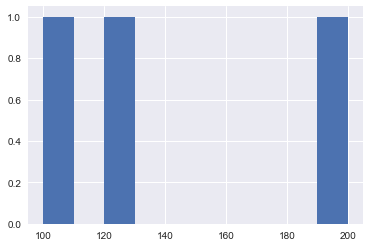

In [216]:
#using replace()
s.replace(-9, np.nan, inplace = True)
h=s.hist()
print('count: {}  missing: {}'.format(s.count(),total_observed-s.count()))
print(s)

In [217]:
s= s.dropna()   #no inplace=True
print(s)

0    100.0
1    120.0
5    200.0
dtype: float64


In [218]:
# re-create the Series
s = pd.Series.from_array([100, np.nan, np.nan, np.nan, 200])
s


0    100.0
1      NaN
2      NaN
3      NaN
4    200.0
dtype: float64

In [219]:
#replace NaN with a new constant
t=s.copy()
t=t.fillna("FAKE NEWS!  SAD.")
print(t)

0                 100
1    FAKE NEWS!  SAD.
2    FAKE NEWS!  SAD.
3    FAKE NEWS!  SAD.
4                 200
dtype: object


In [220]:
#replace NaN w/ last good value
t=s.copy()
t=t.fillna(method='ffill')
print(t)

0    100.0
1    100.0
2    100.0
3    100.0
4    200.0
dtype: float64


In [36]:
#replace NaN w/ next good value
t=s.copy()
t=t.fillna(met='bfill', limit=2)
print(t)

0    100.0
1      NaN
2    200.0
3    200.0
4    200.0
dtype: float64


In [37]:
#replace NaN w/ interpolated
t=s.copy()
t=t.interpolate()
print(t)

0    100.0
1    125.0
2    150.0
3    175.0
4    200.0
dtype: float64


In [56]:
#replace NaN w/ interpolated
t=pd.Series.from_array([100,  120, np.nan, np.nan, np.nan, 200])
t=t.interpolate(method='nearest', direction='backward')
print(t)

0    100.0
1    120.0
2    120.0
3    120.0
4    200.0
5    200.0
dtype: float64


In [235]:
#use mask() to create a new data structure
rh=pd.Series.from_array([3, 50, -4, 99, 201])
masked=rh.mask((rh<0) | (rh >100))
print(masked)


0     3.0
1    50.0
2     NaN
3    99.0
4     NaN
dtype: float64


In [65]:
#grab a slice of 'the good stuff'
fixed=rh[ (rh>=0) & (rh <=100)]
print(fixed)

0     3
1    50
3    99
dtype: int64


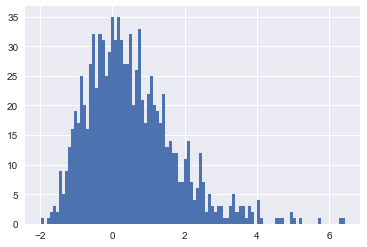

In [249]:
#screen data statistically
data=np.random.gumbel(size=1000)  #used for 'fat tailed' distributions
t=pd.Series(data)
t.hist(bins=100)

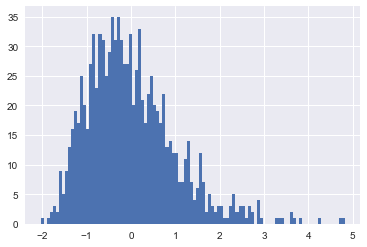

In [250]:
#standardize the data
mean=t.mean()
stdev=t.std()
norm=(t-mean)/stdev
norm.hist(bins=100)

In [246]:
#make a new array with the good values 
test=pd.Series([1,2,3,4,5])
bmask=test[test>3]
print('good values (bmask)\n', bmask)
print()
print('good values index\n', bmask.index)
print()
fixed=test[bmask.index]
print('new series (fixed version)\n', fixed)

good values (bmask)
 3    4
4    5
dtype: int64

good values index
 Int64Index([3, 4], dtype='int64')

new series (fixed version)
 3    4
4    5
dtype: int64


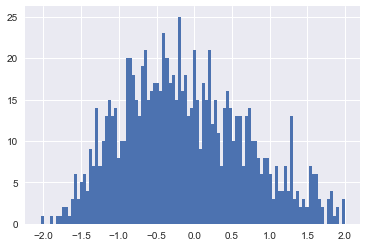

In [254]:
#create a mask against the standardized data
bmask= norm[norm<2]
new_norm=norm[bmask.index]
new_norm.hist(bins=100)

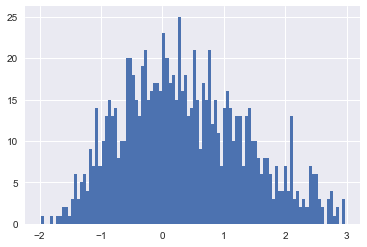

In [255]:
#now apply it against the original
fixed = t[bmask.index]
fixed.hist(bins=100)

In [163]:
#bmask.where(bmask==False)
#fixed.where(fixed>3)
x=15
print('orig', t[x])
print('norm', norm[x])
print('bmask', bmask[x])

orig 5.28016973721
norm 3.50555399241
bmask True


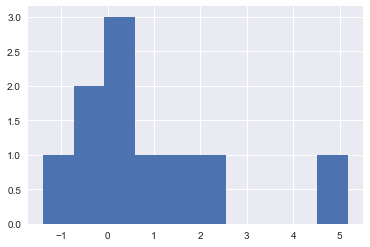

In [207]:
data=np.random.gumbel(size=10)  #used for 'fat tailed' distributions
t=pd.Series(data)
t.hist()


0   -1.141551
1   -0.414986
2    0.243912
3   -0.747169
4   -0.407686
5    0.823836
6    2.330770
7   -0.394156
8    0.317852
9   -0.610822
dtype: float64



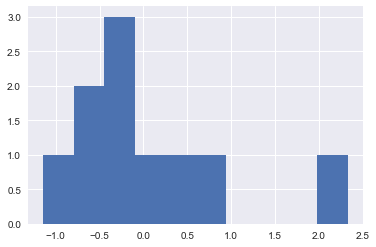

In [212]:

mean=t.mean()
stdev=t.std()
norm=(t-mean)/stdev
#norm.hist(bins=100)
norm.hist()
print(norm)

#print('norm\n', norm)
print()
#print('bmask\n', bmask)



0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.823836
6    2.330770
7    0.000000
8    0.000000
9    0.000000
dtype: float64

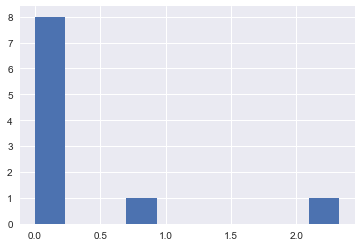

In [213]:

bmask=norm.where(norm>.5, other=0)
bmask.hist()
bmask


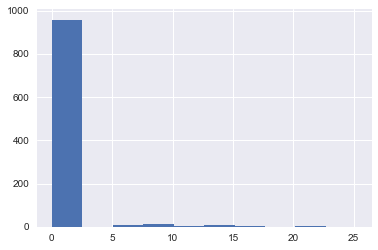

In [206]:
fixed= t * bmask
fixed.hist()

In [203]:
#create a boolean mask
test=pd.Series([1,2,3,-4,5])
bmask=test.where(test<3, other=0)
print(bmask.astype(bool))

test=pd.Series([.1,.2,.3,-.4,.5])
bmask=test.where(test<.3, other=0)
print(bmask.astype(bool))

0     True
1     True
2    False
3     True
4    False
dtype: bool
0     True
1     True
2    False
3     True
4    False
dtype: bool


0    0.605561
1   -0.539191
2   -0.349901
3   -1.017363
4    0.582698
5    0.000000
6   -1.259613
7   -0.794806
8    0.647093
9    0.075447
dtype: float64
0    0.605561
1   -0.539191
2   -0.349901
3   -1.017363
4    0.582698
5    2.050076
6   -1.259613
7   -0.794806
8    0.647093
9    0.075447
dtype: float64
0     True
1     True
2     True
3     True
4     True
5    False
6     True
7     True
8     True
9     True
dtype: bool


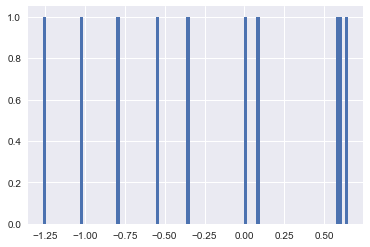

In [234]:
data=np.random.gumbel(size=10)  #used for 'fat tailed' distributions
t=pd.Series(data)

mean=t.mean()
stdev=t.std()
norm=(t-mean)/stdev

bmask=norm.where(norm<1, other=0).astype(bool)
fixed= (norm * bmask)
print(fixed)
print(norm)
print(bmask)
fixed.hist(bins=100)